In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r"C:\Users\Sudharsan G\Downloads\disney_plus_titles.csv"

# Step 1: Load the dataset
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(df.head())  # Display the first few rows of the dataset
except FileNotFoundError:
    print("Error: File not found at the specified path. Please check the path.")

File loaded successfully!
  show_id     type                           title  \
0      s1    Movie                   A Spark Story   
1      s2    Movie                  Spooky Buddies   
2      s3    Movie          The Fault in Our Stars   
3      s4  TV Show                 Dog: Impossible   
4      s5  TV Show  Spidey And His Amazing Friends   

                     director  \
0  Jason Sterman, Leanne Dare   
1                Robert Vince   
2                  Josh Boone   
3                         NaN   
4                         NaN   

                                                cast                country  \
0                      Apthon Corbin, Louis Gonzales                    NaN   
1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
3                                       Matt Beisner          United States   
4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser...   

In [5]:
# Step 2: Basic exploration
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB
None

Missing Values:
show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in      

In [7]:
# Step 3: Data Cleaning
# Handling missing values (example: fill with 'Unknown' for categorical columns)
df.fillna('Unknown', inplace=True)

# Ensure there are no missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [9]:
# Step 4: Exploratory Data Analysis
# Distribution of content ratings
print("\nUnique Ratings:")
print(df['rating'].value_counts())


Unique Ratings:
rating
TV-G        307
TV-PG       275
G           235
PG          227
TV-Y7       130
TV-14        72
PG-13        60
TV-Y         48
TV-Y7-FV     12
Unknown       2
Name: count, dtype: int64


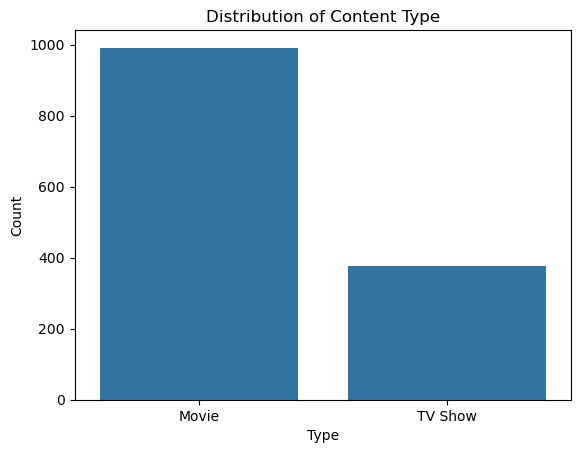

In [11]:
# Example visualization: Content type distribution
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

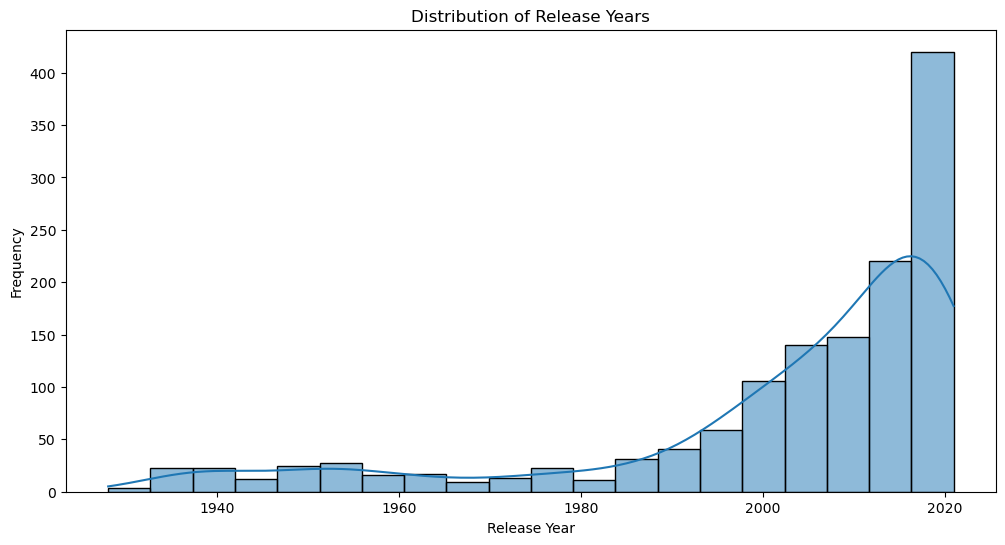

In [13]:
# Example visualization: Release years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=20, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Example: Count of titles per duration
print("\nDuration and their Counts:")
if 'duration' in df.columns:
    duration_counts = df['duration'].value_counts()
    print(duration_counts)
else:
    print("Duration column not found in the dataset.")



Duration and their Counts:
duration
1 Season      204
2 Seasons      80
3 Seasons      43
7 min          39
44 min         39
             ... 
10 Seasons      1
160 min         1
16 Seasons      1
31 min          1
68 min          1
Name: count, Length: 156, dtype: int64


In [29]:
# Step 5: Insights
print("\nInsights from the Data:")
print("- The dataset contains {} movies and {} TV shows.".format(
    (df['type'] == 'Movie').sum(),
    (df['type'] == 'TV Show').sum()
))



Insights from the Data:
- The dataset contains 991 movies and 377 TV shows.


In [31]:
print("- The oldest content in the dataset was released in {}.".format(df['release_year'].min()))
print("- The most common rating is '{}'.".format(df['rating'].mode()[0]))

- The oldest content in the dataset was released in 1928.
- The most common rating is 'TV-G'.



Top 10 Directors with the Most Content:
director
Unknown             440
Jack Hannah          17
John Lasseter        16
Paul Hoen            16
Charles Nichols      12
Robert Stevenson     12
Bob Peterson         10
Vincent McEveety     10
Kenny Ortega          9
James Algar           9
Name: count, dtype: int64


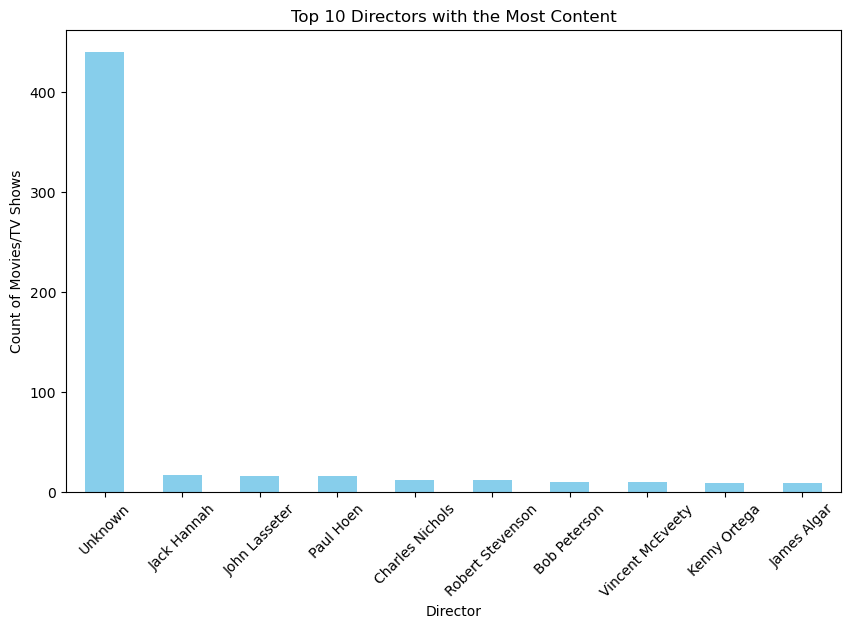

In [57]:
#Question 1: Which directors have the most content listed in the dataset?
# Top 10 directors with the most content
top_directors = df['director'].value_counts().head(10)
print("\nTop 10 Directors with the Most Content:")
print(top_directors)

# Plotting the top directors
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors with the Most Content')
plt.xlabel('Director')
plt.ylabel('Count of Movies/TV Shows')
plt.xticks(rotation=45)
plt.show()


C:\Users\Sudharsan G\AppData\Local\Temp\ipykernel_39124\2008240164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set1')


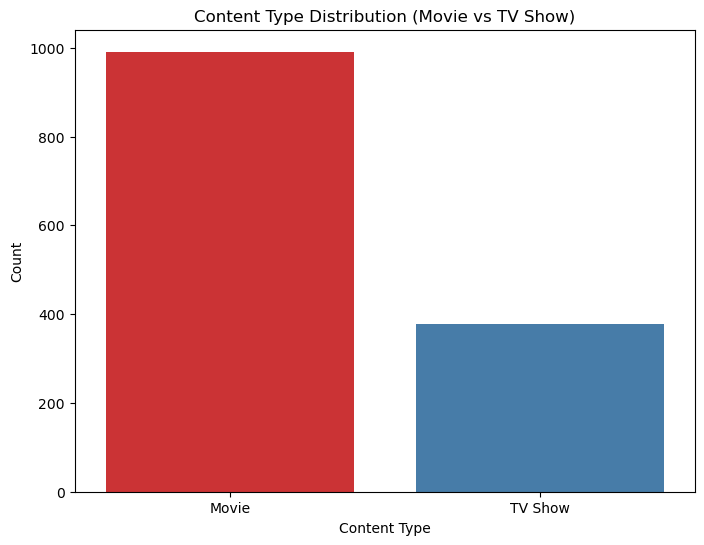

In [59]:
 #Question 2: What is the distribution of content type (Movie vs TV Show) in the dataset?
# Distribution of content type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='Set1')
plt.title('Content Type Distribution (Movie vs TV Show)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


C:\Users\Sudharsan G\AppData\Local\Temp\ipykernel_39124\3365326975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='Set2')


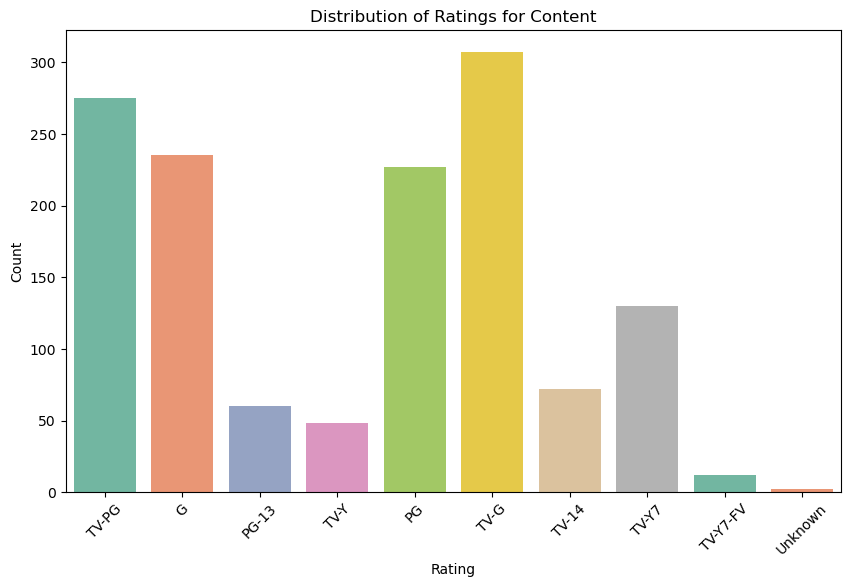

In [53]:
#Question 3: What is the distribution of ratings for the content?
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='Set2')
plt.title('Distribution of Ratings for Content')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


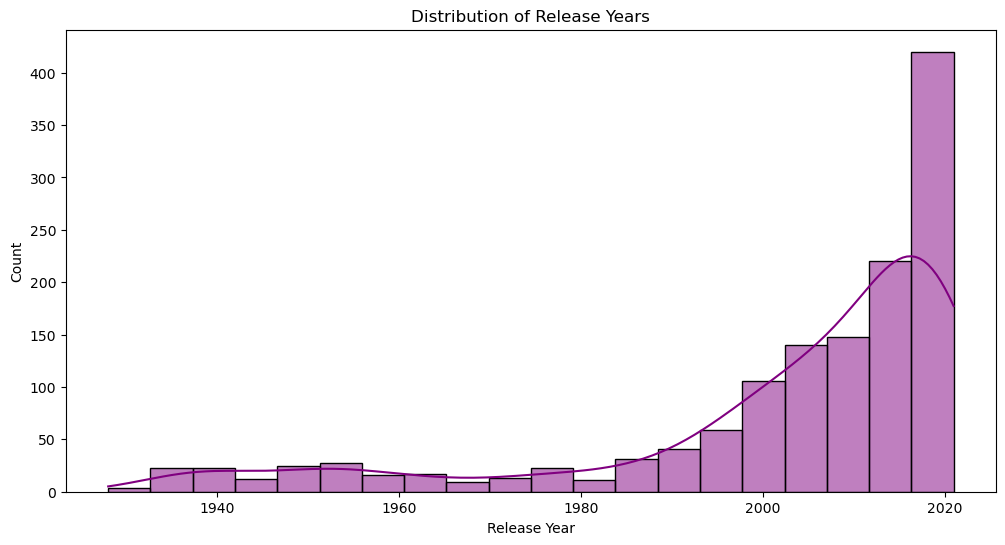

In [55]:
#Question 4: How does the content's release year vary?
# Distribution of content release years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=20, kde=True, color='purple')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()



Top 10 Countries with the Most Content:
country
United States                    976
Unknown                          175
United States, Canada             28
United Kingdom                    23
United States, United Kingdom     19
Canada, United States             17
United Kingdom, United States     14
United States, Australia           7
Canada                             5
United States, France              4
Name: count, dtype: int64


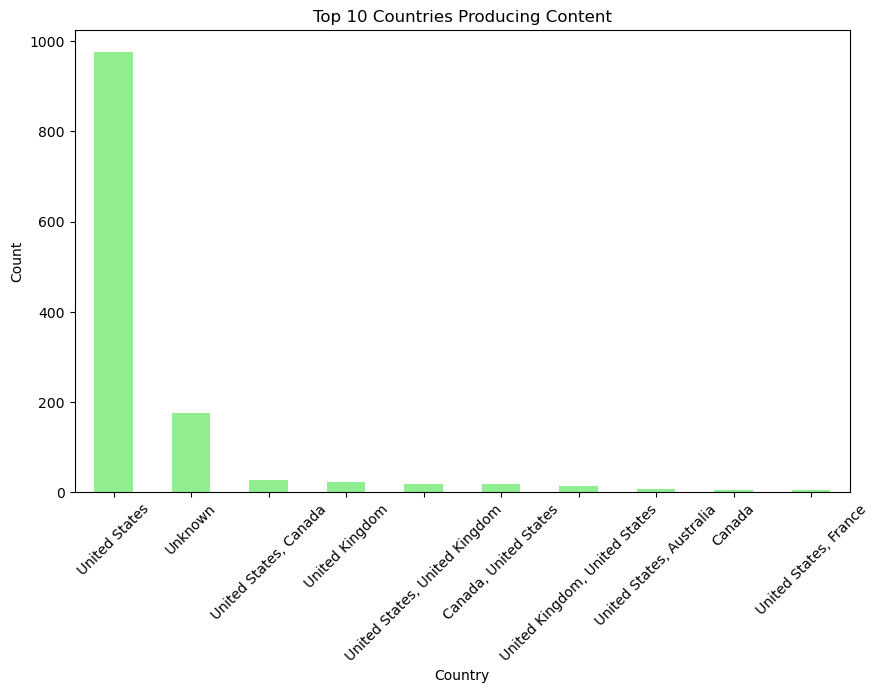

In [61]:
#Question 5: Which countries have the most content available?
# Top 10 countries with the most content
top_countries = df['country'].value_counts().head(10)
print("\nTop 10 Countries with the Most Content:")
print(top_countries)

# Plotting the top countries
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Top 10 Genres with the Most Content:
listed_in
Family              602
Animation           516
Comedy              497
Action-Adventure    438
Animals & Nature    199
Coming of Age       199
Fantasy             180
Documentary         167
Kids                137
Drama               129
Name: count, dtype: int64


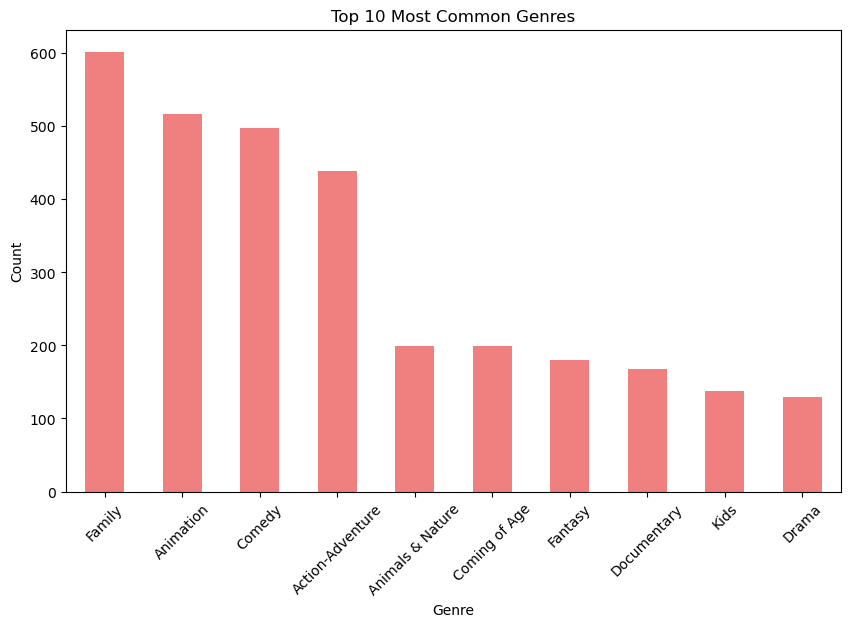

In [63]:
# Question 6: What are the most common genres for content?
# Assuming 'listed_in' column contains genres
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)
print("\nTop 10 Genres with the Most Content:")
print(genre_counts)

# Plot the top genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Sudharsan G\AppData\Local\Temp\ipykernel_39124\2956041609.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)



Average Duration for Each Content Type:
type
Movie      73.080727
TV Show     2.137931
Name: duration_numeric, dtype: float64


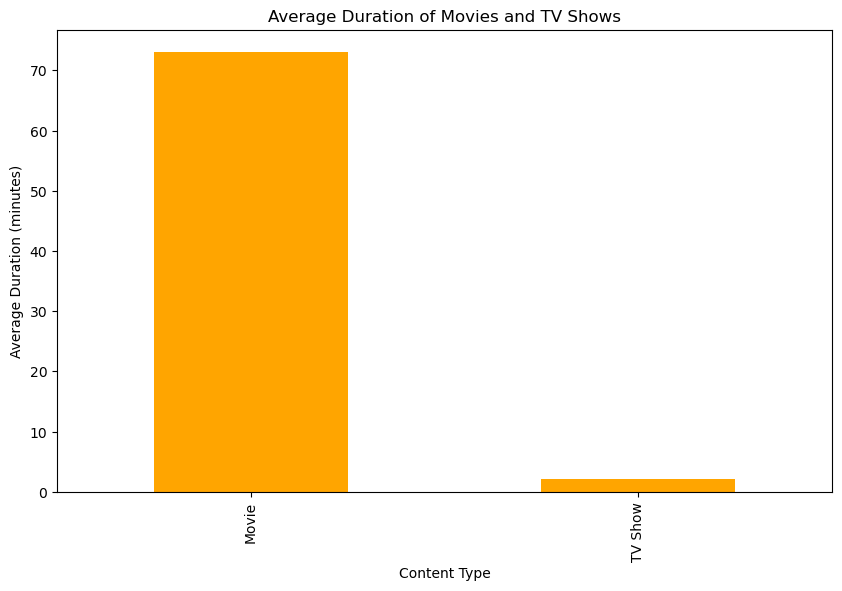

In [65]:
#Question 7: What is the average duration of movies and TV shows?
# Extract numeric duration for movies and TV shows
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Average duration for each content type
average_duration = df.groupby('type')['duration_numeric'].mean()
print("\nAverage Duration for Each Content Type:")
print(average_duration)

# Plot the average durations
average_duration.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Average Duration of Movies and TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Average Duration (minutes)')
plt.show()


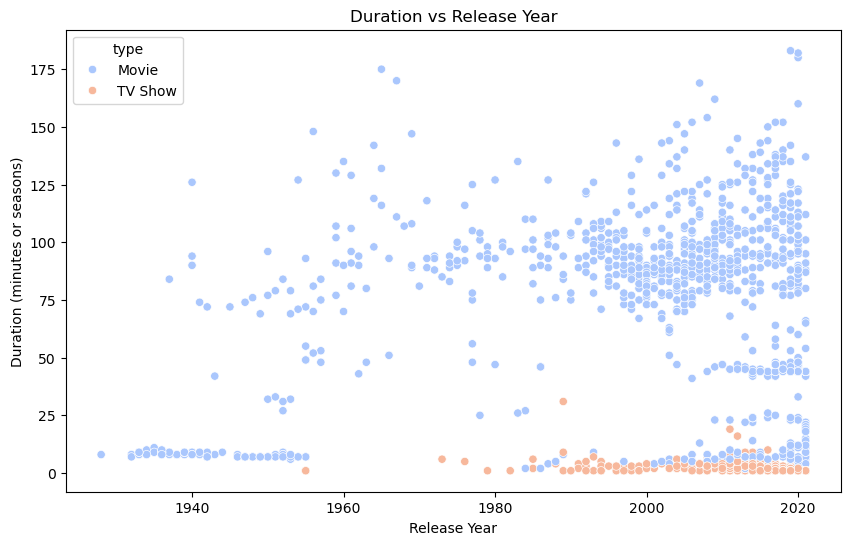

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration_numeric', data=df, hue='type', palette='coolwarm')
plt.title('Duration vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes or seasons)')
plt.show()


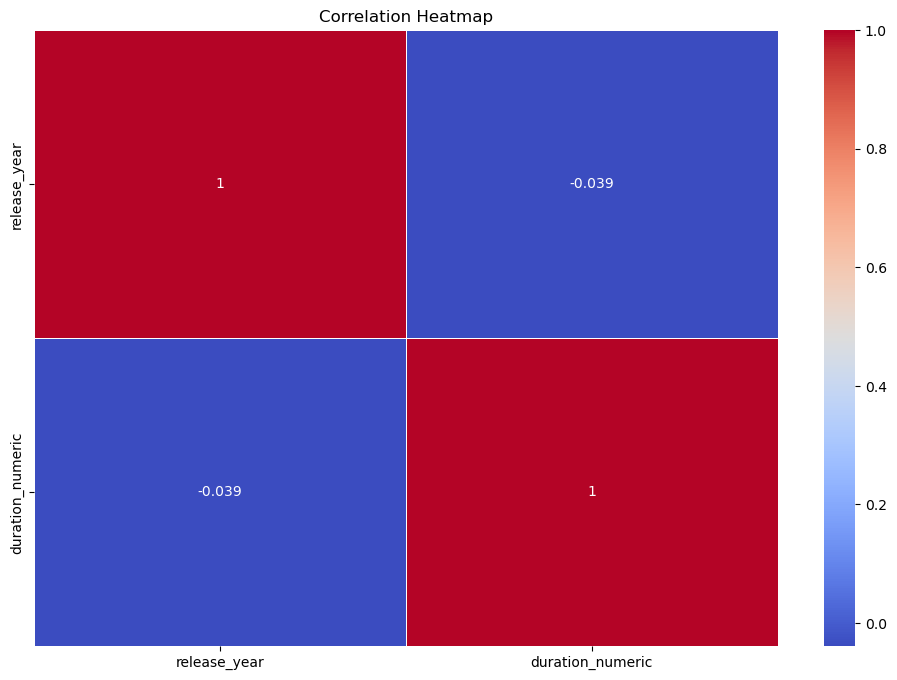

In [69]:
# Only select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


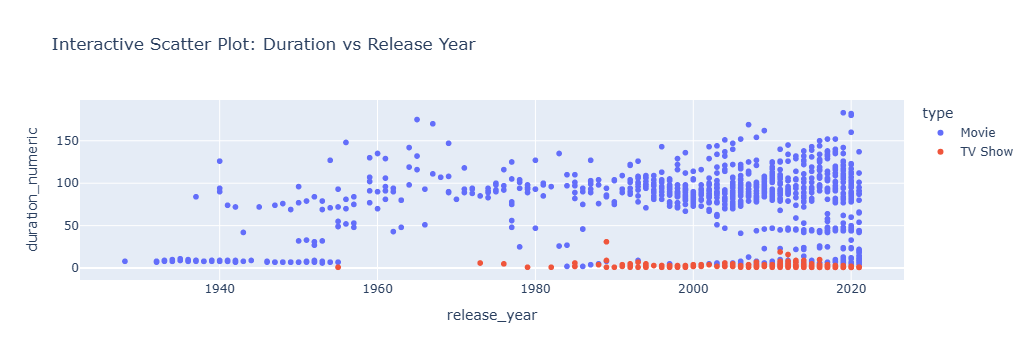

In [75]:
import plotly.express as px

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='release_year', y='duration_numeric', color='type',
                 title='Interactive Scatter Plot: Duration vs Release Year')
fig.show()
